### Load The Dataset

In [1]:
# Load libraries
import numpy as np
import pandas as pd
from pandas import set_option
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_boston
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor

from sklearn.pipeline import Pipeline

from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import ExtraTreesRegressor

from sklearn.metrics import mean_squared_error
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline
sns.set_style('darkgrid')
plt.style.use('seaborn-bright')

In [2]:
dataset = load_boston()
dataset['MEDV'] = dataset.target

In [3]:
boston_df = pd.DataFrame(data = dataset.data, columns=dataset.feature_names)
boston_df['MEDV'] = dataset.target

### Analyze data

In [4]:
#shape
print(boston_df.shape)

(506, 14)


In [5]:
#types
print(boston_df.dtypes)

CRIM       float64
ZN         float64
INDUS      float64
CHAS       float64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD        float64
TAX        float64
PTRATIO    float64
B          float64
LSTAT      float64
MEDV       float64
dtype: object


In [6]:
#head 
boston_df.head(20)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3.0,222.0,18.7,394.12,5.21,28.7
6,0.08829,12.5,7.87,0.0,0.524,6.012,66.6,5.5605,5.0,311.0,15.2,395.60,12.43,22.9
7,0.14455,12.5,7.87,0.0,0.524,6.172,96.1,5.9505,5.0,311.0,15.2,396.90,19.15,27.1
8,0.21124,12.5,7.87,0.0,0.524,5.631,100.0,6.0821,5.0,311.0,15.2,386.63,29.93,16.5
9,0.17004,12.5,7.87,0.0,0.524,6.004,85.9,6.5921,5.0,311.0,15.2,386.71,17.10,18.9


In [7]:
#descriptions
set_option('precision', 1)
set_option('display.max_columns',None)
print(boston_df.describe())

          CRIM     ZN  INDUS     CHAS    NOX     RM    AGE    DIS    RAD  \
count  5.1e+02  506.0  506.0  5.1e+02  506.0  506.0  506.0  506.0  506.0   
mean   3.6e+00   11.4   11.1  6.9e-02    0.6    6.3   68.6    3.8    9.5   
std    8.6e+00   23.3    6.9  2.5e-01    0.1    0.7   28.1    2.1    8.7   
min    6.3e-03    0.0    0.5  0.0e+00    0.4    3.6    2.9    1.1    1.0   
25%    8.2e-02    0.0    5.2  0.0e+00    0.4    5.9   45.0    2.1    4.0   
50%    2.6e-01    0.0    9.7  0.0e+00    0.5    6.2   77.5    3.2    5.0   
75%    3.7e+00   12.5   18.1  0.0e+00    0.6    6.6   94.1    5.2   24.0   
max    8.9e+01  100.0   27.7  1.0e+00    0.9    8.8  100.0   12.1   24.0   

         TAX  PTRATIO      B  LSTAT   MEDV  
count  506.0    506.0  506.0  506.0  506.0  
mean   408.2     18.5  356.7   12.7   22.5  
std    168.5      2.2   91.3    7.1    9.2  
min    187.0     12.6    0.3    1.7    5.0  
25%    279.0     17.4  375.4    6.9   17.0  
50%    330.0     19.1  391.4   11.4   21.2  


In [8]:
#correlation
set_option('precision', 2)
print(boston_df.corr(method='pearson'))

         CRIM    ZN  INDUS      CHAS   NOX    RM   AGE   DIS       RAD   TAX  \
CRIM     1.00 -0.20   0.41 -5.59e-02  0.42 -0.22  0.35 -0.38  6.26e-01  0.58   
ZN      -0.20  1.00  -0.53 -4.27e-02 -0.52  0.31 -0.57  0.66 -3.12e-01 -0.31   
INDUS    0.41 -0.53   1.00  6.29e-02  0.76 -0.39  0.64 -0.71  5.95e-01  0.72   
CHAS    -0.06 -0.04   0.06  1.00e+00  0.09  0.09  0.09 -0.10 -7.37e-03 -0.04   
NOX      0.42 -0.52   0.76  9.12e-02  1.00 -0.30  0.73 -0.77  6.11e-01  0.67   
RM      -0.22  0.31  -0.39  9.13e-02 -0.30  1.00 -0.24  0.21 -2.10e-01 -0.29   
AGE      0.35 -0.57   0.64  8.65e-02  0.73 -0.24  1.00 -0.75  4.56e-01  0.51   
DIS     -0.38  0.66  -0.71 -9.92e-02 -0.77  0.21 -0.75  1.00 -4.95e-01 -0.53   
RAD      0.63 -0.31   0.60 -7.37e-03  0.61 -0.21  0.46 -0.49  1.00e+00  0.91   
TAX      0.58 -0.31   0.72 -3.56e-02  0.67 -0.29  0.51 -0.53  9.10e-01  1.00   
PTRATIO  0.29 -0.39   0.38 -1.22e-01  0.19 -0.36  0.26 -0.23  4.65e-01  0.46   
B       -0.39  0.18  -0.36  4.88e-02 -0.

### Data Visualisation

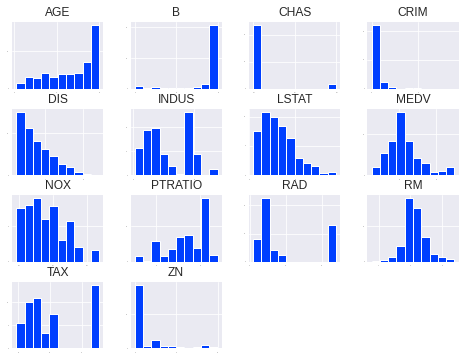

In [9]:
#histograms
plt.style.use('seaborn-dark')
boston_df.hist(sharex=False, sharey=False, xlabelsize=1, ylabelsize=1, figsize=(8,6))
plt.show()

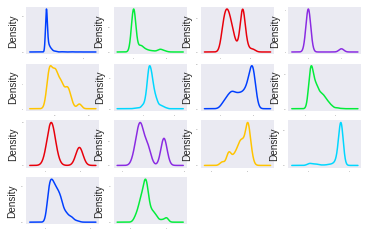

In [10]:
#density plot
boston_df.plot(kind='density', subplots=True, layout=(4,4), sharex=False, legend=False, 
               fontsize=1)
plt.show()

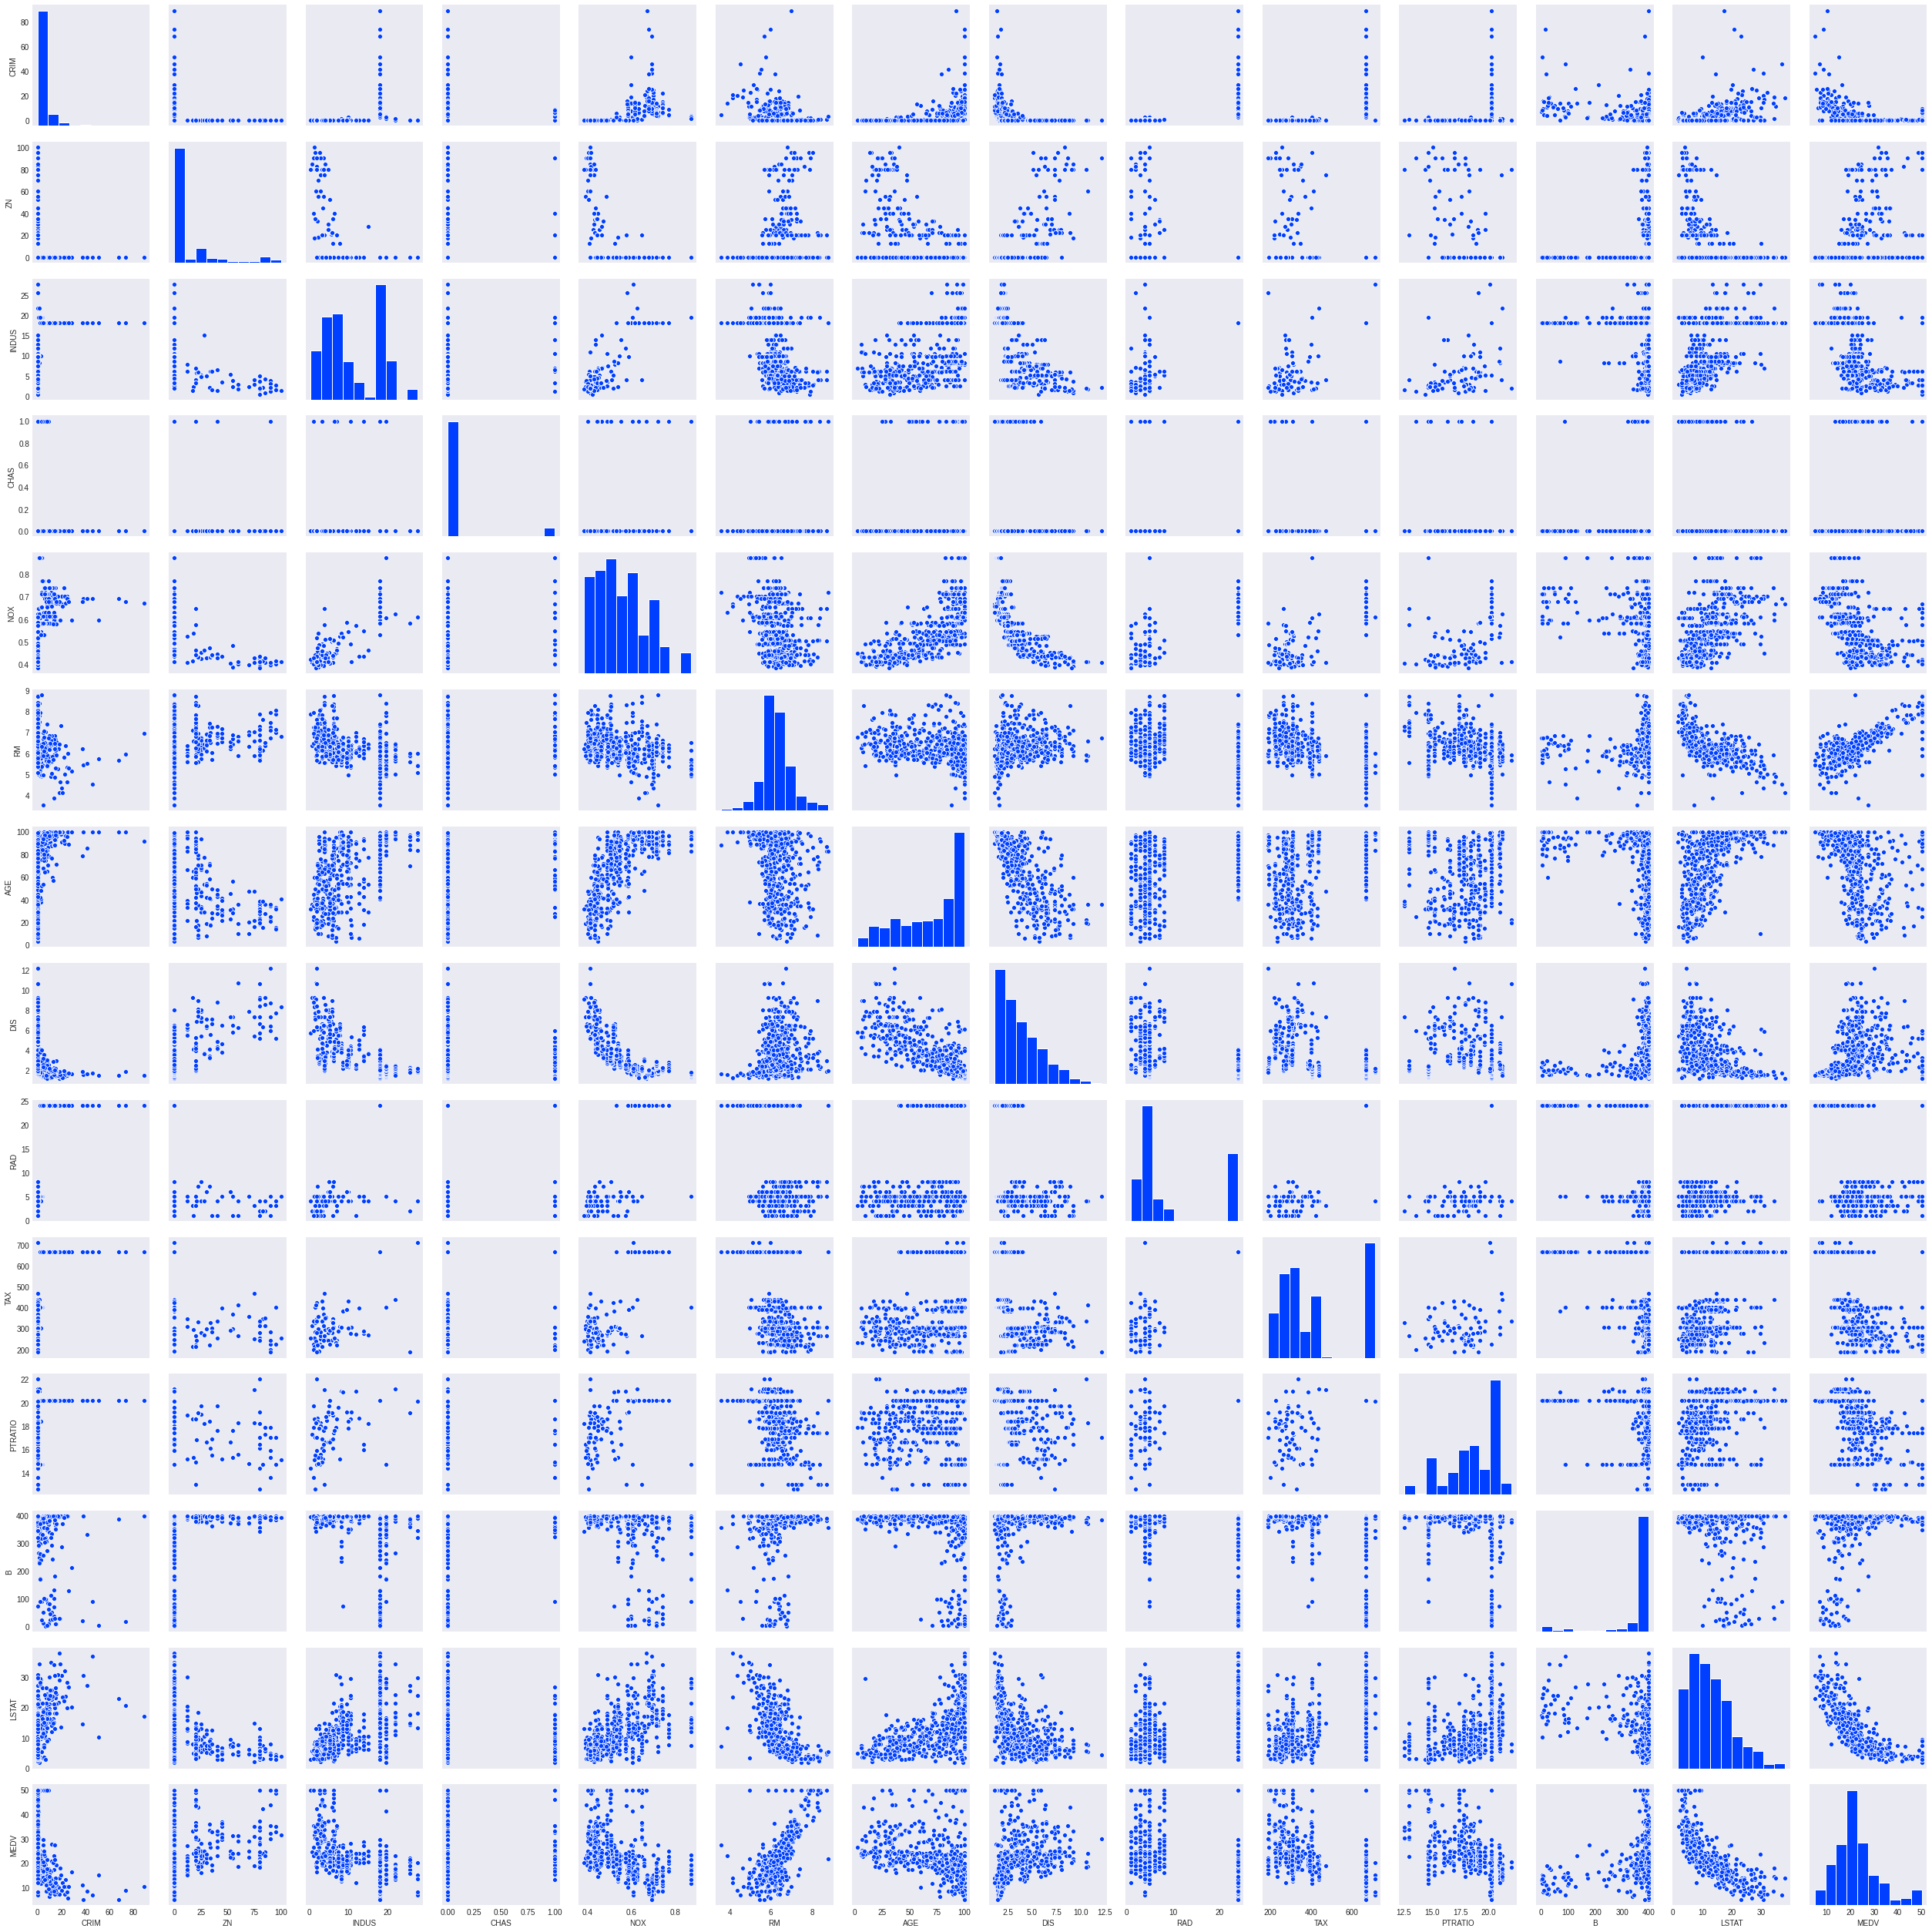

In [11]:
#Multimodal visualization
sns.pairplot(boston_df , palette='husl')

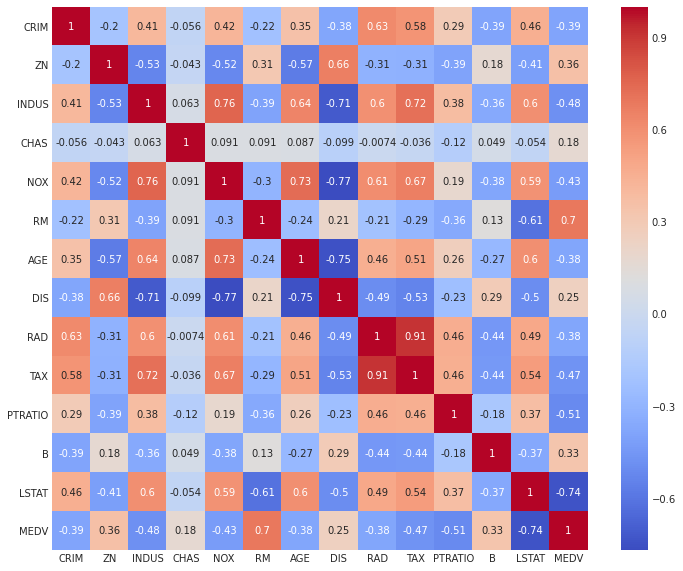

In [12]:
plt.figure(figsize=(12,10))
sns.set_style('whitegrid')
sns.heatmap(boston_df.corr(),cmap="coolwarm",annot=True)
plt.yticks(rotation=0)
plt.show()

### Validation Dataset

In [37]:
Y = boston_df['MEDV']
X = boston_df.drop(columns='MEDV',axis=1)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33, random_state=43 )

In [38]:
# Test options and evaluation metric
num_folds = 10
seed = 7
scoring = 'neg_mean_squared_error'

In [39]:
# Spot-Check Algorithms
models = []
models.append(('LR', LinearRegression()))
models.append(('LASSO', Lasso()))
models.append(('EN', ElasticNet()))
models.append(('KNN', KNeighborsRegressor()))
models.append(('CART', DecisionTreeRegressor()))
models.append(('SVR', SVR()))

In [40]:
# evaluate each model in turn
results = []
names = []
for name, model in models:
    kfold = KFold(n_splits=num_folds, random_state=seed)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    print('{0} : {1:.3f} ({2:.3f})'.format(name, cv_results.mean(), cv_results.std()))

LR : -25.224 (8.584)
LASSO : -29.317 (10.187)
EN : -28.629 (9.833)
KNN : -47.838 (19.642)
CART : -20.546 (9.791)
SVR : -86.642 (39.026)


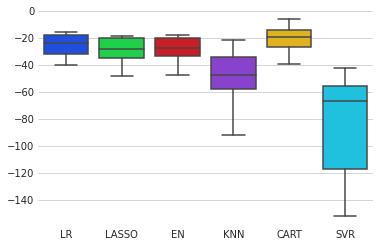

In [41]:
sns.boxplot(x=names, y=results)

In [48]:
# Standardize the dataset
pipelines = [
    ('ScaledLR' , Pipeline([('Scaler', StandardScaler()),('LR', LinearRegression())])),
    ('ScaledLasso', Pipeline([('Scaler', StandardScaler()),('Lasso', Lasso())])),
    ('ScaledEN', Pipeline([('Scaler', StandardScaler()),('EN',
    ElasticNet())])),
    ('ScaledKNN', Pipeline([('Scaler', StandardScaler()),('KNN',
    KNeighborsRegressor())])),
    ('ScaledCART', Pipeline([('Scaler', StandardScaler()),('CART',
    DecisionTreeRegressor())])),
    ('ScaledSVR', Pipeline([('Scaler', StandardScaler()),('SVR', SVR())]))
]

results = []
names = []
for name, model in pipelines:
    kfold = KFold(n_splits=num_folds, random_state=seed)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    print('{0} : {1:.3f} ({2:.3f})'.format(name, cv_results.mean(), cv_results.std()))

ScaledLR : -25.224 (8.584)
ScaledLasso : -30.606 (12.710)
ScaledEN : -32.693 (15.666)
ScaledKNN : -26.123 (16.969)
ScaledCART : -21.260 (11.091)
ScaledSVR : -34.891 (24.432)
CPU times: user 1.11 s, sys: 48 ms, total: 1.16 s
Wall time: 370 ms


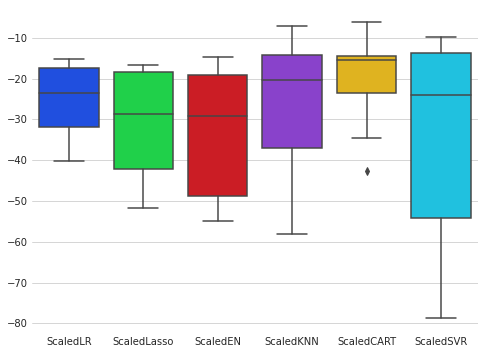

In [43]:
plt.figure(figsize=(8,6))
sns.boxplot(x=names, y=results)

In [44]:
# KNN Algorithm tuning
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
k_values = np.array([1,3,5,7,9,11,13,15,17,19,21])
param_grid = dict(n_neighbors=k_values)
model = KNeighborsRegressor()
kfold = KFold(n_splits=num_folds, random_state=seed)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
grid_result = grid.fit(rescaledX, Y_train)

In [45]:
print('Best {0:.3f} using {1}'.format(grid_result.best_score_, grid_result.best_params_))
print('\n')
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, std, param in zip(means, stds, params):
    print('{0:.3f} ({1:.3f}) with {2}'.format(mean,std,param))

Best -25.554 using {'n_neighbors': 9}


-34.959 (15.695) with {'n_neighbors': 1}
-26.066 (13.484) with {'n_neighbors': 3}
-25.911 (16.944) with {'n_neighbors': 5}
-26.294 (17.990) with {'n_neighbors': 7}
-25.554 (16.928) with {'n_neighbors': 9}
-26.167 (17.996) with {'n_neighbors': 11}
-27.725 (18.661) with {'n_neighbors': 13}
-27.855 (18.314) with {'n_neighbors': 15}
-28.401 (17.893) with {'n_neighbors': 17}
-29.340 (18.047) with {'n_neighbors': 19}
-30.416 (19.042) with {'n_neighbors': 21}


### Ensemble Methods

In [51]:
# ensembles
ensembles = []
ensembles.append(('ScaledAB', Pipeline([('Scaler', StandardScaler()),('AB',
AdaBoostRegressor())])))
ensembles.append(('ScaledGBM', Pipeline([('Scaler', StandardScaler()),('GBM',
GradientBoostingRegressor())])))
ensembles.append(('ScaledRF', Pipeline([('Scaler', StandardScaler()),('RF',
RandomForestRegressor())])))
ensembles.append(('ScaledET', Pipeline([('Scaler', StandardScaler()),('ET',
ExtraTreesRegressor())])))

results = []
names = []
for name, model in ensembles:
    kfold = KFold(n_splits=num_folds, random_state=seed)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    print('{0} : {1:.3f} ({2:.3f})'.format(name, cv_results.mean(), cv_results.std()))


ScaledAB : -16.996 (7.966)
ScaledGBM : -10.512 (4.833)
ScaledRF : -14.614 (7.840)
ScaledET : -14.914 (8.512)


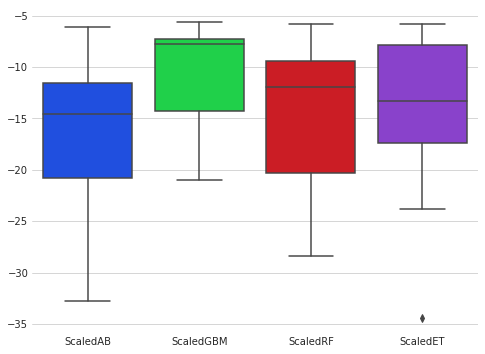

In [52]:
plt.figure(figsize=(8,6))
sns.boxplot(x=names, y=results)

In [58]:
# Tune scaled GBM
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
param_grid = dict(n_estimators=np.array([50,100,150,200,250,300,350,400]))
model = GradientBoostingRegressor(random_state=seed)
kfold = KFold(n_splits=num_folds, random_state=seed)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
grid_result = grid.fit(rescaledX, Y_train)

In [59]:
print('Best {0:.3f} using {1}'.format(grid_result.best_score_, grid_result.best_params_))
print('\n')
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, std, param in zip(means, stds, params):
    print('{0:.3f} ({1:.3f}) with {2}'.format(mean,std,param))

Best -10.314 using {'n_estimators': 100}


-10.623 (4.870) with {'n_estimators': 50}
-10.314 (4.713) with {'n_estimators': 100}
-10.431 (4.713) with {'n_estimators': 150}
-10.554 (4.768) with {'n_estimators': 200}
-10.702 (4.811) with {'n_estimators': 250}
-10.808 (4.879) with {'n_estimators': 300}
-10.864 (4.919) with {'n_estimators': 350}
-10.881 (4.919) with {'n_estimators': 400}


### Finalize the model

In [60]:
# prepare the model
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
model = GradientBoostingRegressor(random_state=seed, n_estimators=100)
model.fit(rescaledX, Y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=100, n_iter_no_change=None, presort='auto',
             random_state=7, subsample=1.0, tol=0.0001,
             validation_fraction=0.1, verbose=0, warm_start=False)

In [61]:
# transform the validation dataset
rescaledValidationX = scaler.transform(X_test)
predictions = model.predict(rescaledValidationX)
print(mean_squared_error(Y_test, predictions))

8.628650553038634
